# Importing the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install pyarrow

In [3]:
data = pd.read_feather(r"C:\Users\user\Downloads\Sales_data.ftr")

In [4]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.shape

(186850, 6)

In [6]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
data = data.dropna(how = 'all')

In [9]:
data.duplicated().sum()

618

In [10]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [11]:
data = data.drop_duplicates()

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(185687, 6)

# Analyzing sales by month

In [14]:
data['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185687, dtype: object

In [15]:
#Splitting the date
def month(x):
    return x.split('/')[0]

In [16]:
data['Month'] = data['Order Date'].apply(month)

In [17]:
#Long format 
#'04/19/19 08:46'.split(' ')[0].split('/')[0]

In [18]:
filter1 = data['Month'] == 'Order Date'

In [19]:
#remove entry where order date does not have a date value
data = data[~filter1]

In [20]:
data['Month'] = data['Month'].astype(int)

In [21]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
data['Price Each'] = data['Price Each'].astype(float)

In [22]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [23]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [24]:
data.groupby(['Month'])['Sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

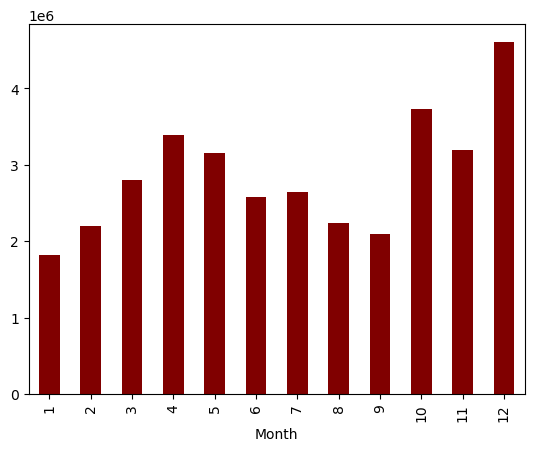

In [25]:
#Bar plot visualization
data.groupby(['Month'])['Sales'].sum().plot(kind = 'bar', color = 'maroon')

# Analyzing Sales by City

In [26]:
#!pip install squarify

In [27]:
import squarify

In [28]:
#Splitting the city
def city(x):
    return x.split(',')[1]

In [29]:
data['City'] = data['Purchase Address'].apply(city)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


Text(0, 0.5, '')

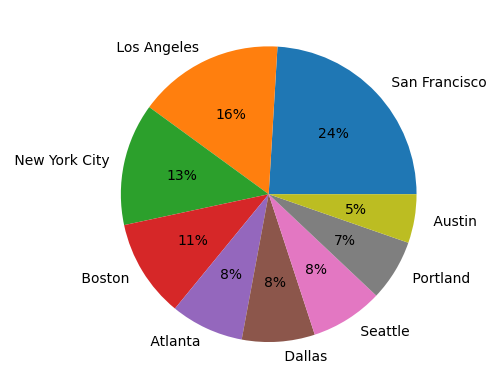

In [30]:
#Order count by city
pd.value_counts(data['City']).plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')

In [31]:
#Sum of sales by city
city_df = data.groupby(['City'])['Sales'].sum()
city_df.sort_values(ascending=True)

City
 Austin           1818044.33
 Portland         2319331.94
 Seattle          2745046.02
 Dallas           2765373.96
 Atlanta          2794199.07
 Boston           3658627.65
 New York City    4661867.14
 Los Angeles      5448304.28
 San Francisco    8254743.55
Name: Sales, dtype: float64

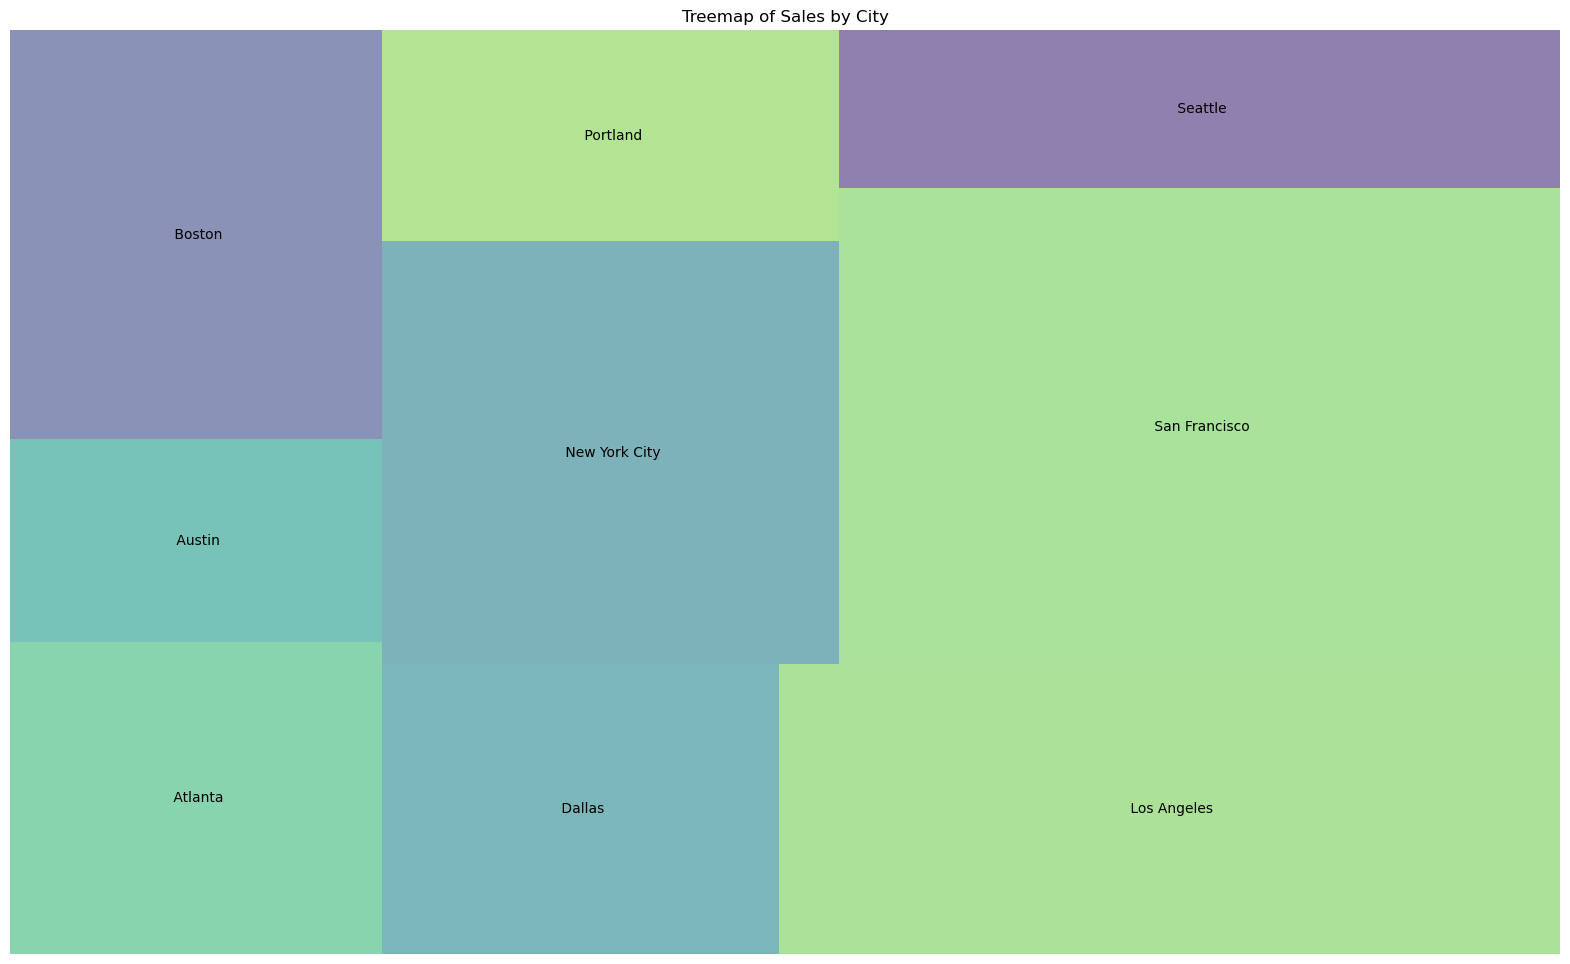

In [32]:
sizes = city_df
labels = city_df.index

plt.figure(figsize = (20,12))
squarify.plot(sizes=sizes, label=labels, alpha = 0.6)
plt.axis('off')
plt.title('Treemap of Sales by City')

plt.show()

# Product Analysis

In [33]:
data.groupby(['Product'])['Sales'].sum().sort_values(ascending=True)

Product
AAA Batteries (4-pack)          92648.14
AA Batteries (4-pack)          106041.60
Wired Headphones               246082.76
USB-C Charging Cable           285975.45
Lightning Charging Cable       346376.55
LG Dryer                       387600.00
LG Washing Machine             399600.00
20in Monitor                   453818.74
Vareebadd Phone                827200.00
27in FHD Monitor              1131074.59
Bose SoundSport Headphones    1342865.70
Flatscreen TV                 1443900.00
Apple Airpods Headphones      2345550.00
34in Ultrawide Monitor        2352898.08
27in 4K Gaming Monitor        2433147.61
Google Phone                  3317400.00
ThinkPad Laptop               4127958.72
iPhone                        4792900.00
Macbook Pro Laptop            8032500.00
Name: Sales, dtype: float64

<AxesSubplot:ylabel='Product'>

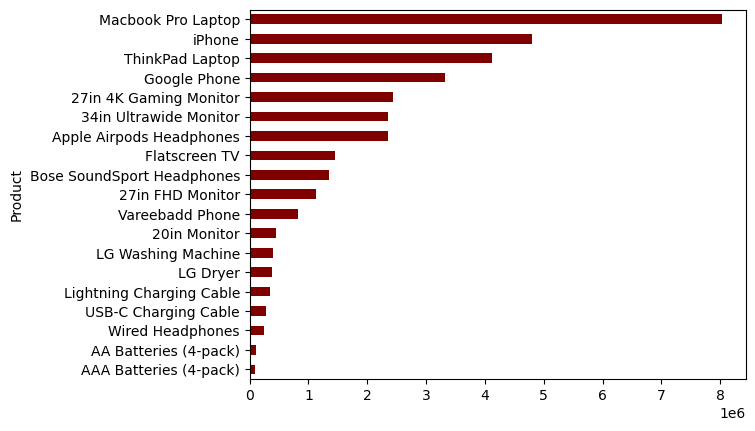

In [34]:
data.groupby(['Product'])['Sales'].sum().sort_values(ascending=True).plot(kind='barh', color='maroon')

In [35]:
#Relationship between product and price
product_df = data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})
product_df = product_df.reset_index()
product_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


C:\Users\user\AppData\Local\Temp\ipykernel_6308\1420515766.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_df['Product'].values, rotation = 'vertical')


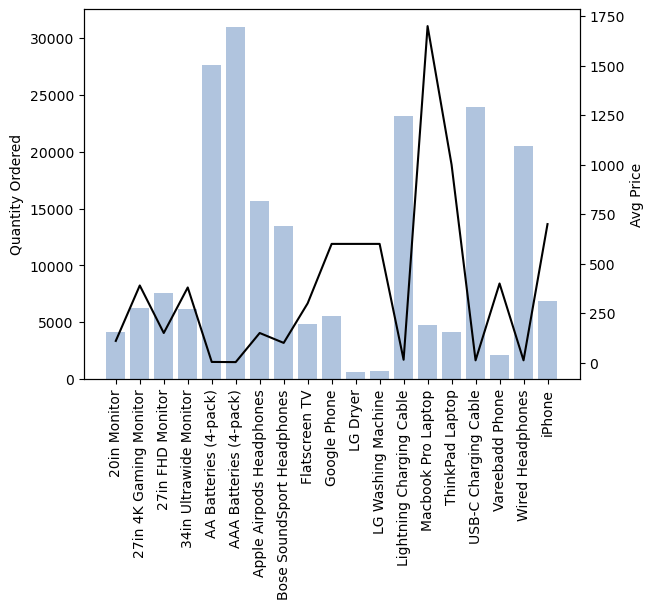

<Figure size 2500x2000 with 0 Axes>

In [36]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


plt.figure(figsize = (25,20))
ax1.bar(product_df['Product'], product_df['Quantity Ordered'],color = 'lightsteelblue')
ax2.plot(product_df['Product'], product_df['Price Each'], color='black')

ax1.set_xticklabels(product_df['Product'].values, rotation = 'vertical')
ax1.set_ylabel('Quantity Ordered', color='black')
ax2.set_ylabel('Avg Price', color='black')

plt.show()

In [37]:
data['Product'].value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [38]:
most_bought = data['Product'].value_counts()[0:5].index
most_bought

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [39]:
most_bought_df = data[data['Product'].isin(most_bought)]
most_bought_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [40]:
pd.crosstab(most_bought_df['Month'], most_bought_df['Product'])

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


In [41]:
plot = pd.crosstab(most_bought_df['Month'], most_bought_df['Product'])

<AxesSubplot:xlabel='Month'>

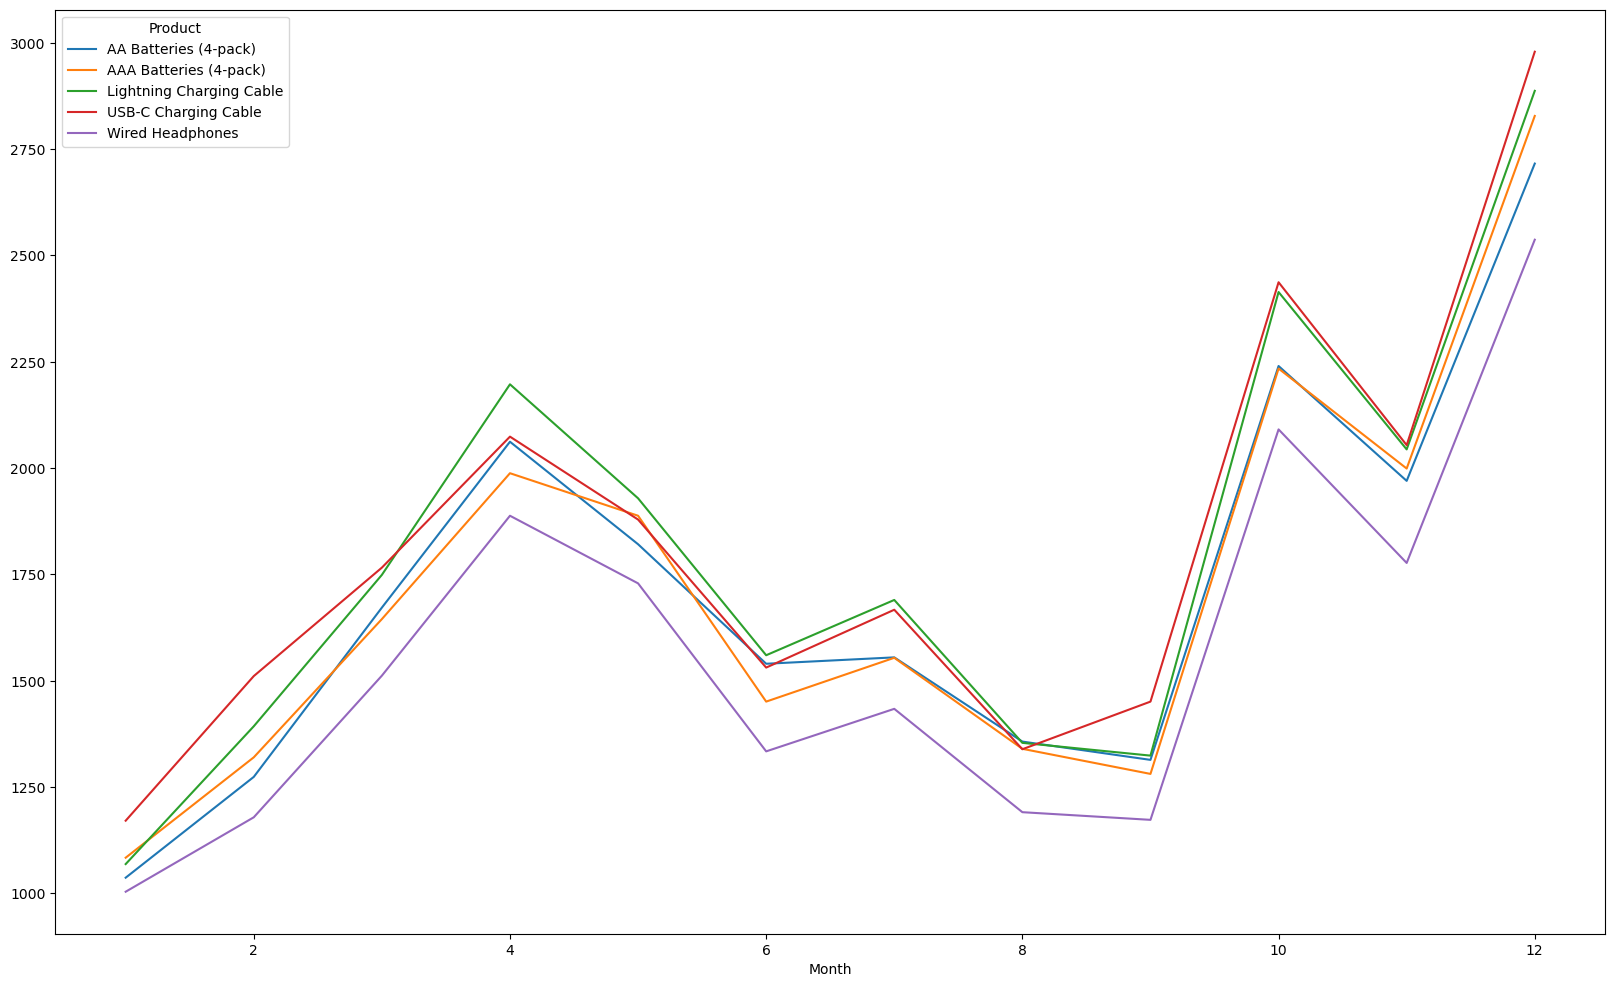

In [42]:
plot.plot(figsize = (20,12))

<AxesSubplot:xlabel='Month'>

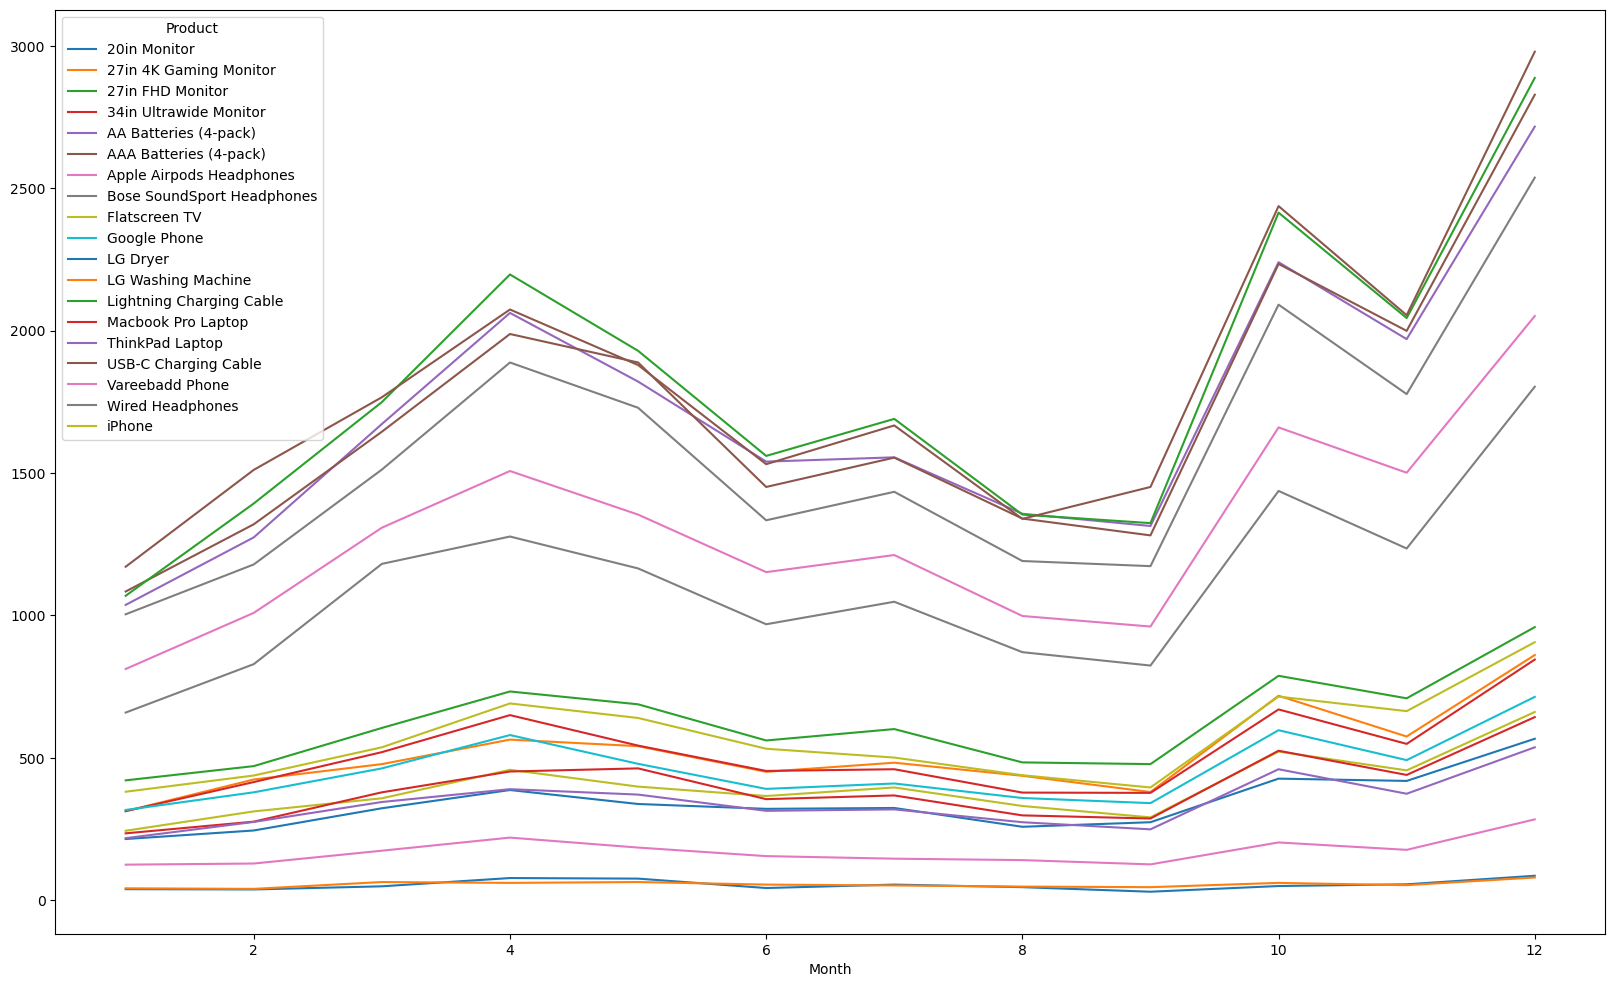

In [43]:
most_bought1 = data['Product'].value_counts().index
most_bought_df1 = data[data['Product'].isin(most_bought1)]
pd.crosstab(most_bought_df1['Month'], most_bought_df1['Product'])
plot1 = pd.crosstab(most_bought_df1['Month'], most_bought_df1['Product'])
plot1.plot(figsize = (20,12))

In [44]:
data_df = data[data['Order ID'].duplicated(keep = False)]
data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [45]:
data_df1 = data_df.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns = {'Product':'Grouped Products'})
data_df1

,Order ID,Grouped Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [46]:
dup_data = data_df.merge(data_df1 , how = 'left' , on='Order ID')
no_dup = dup_data.drop_duplicates(subset=['Order ID'])
no_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Grouped Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


Text(0, 0.5, '')

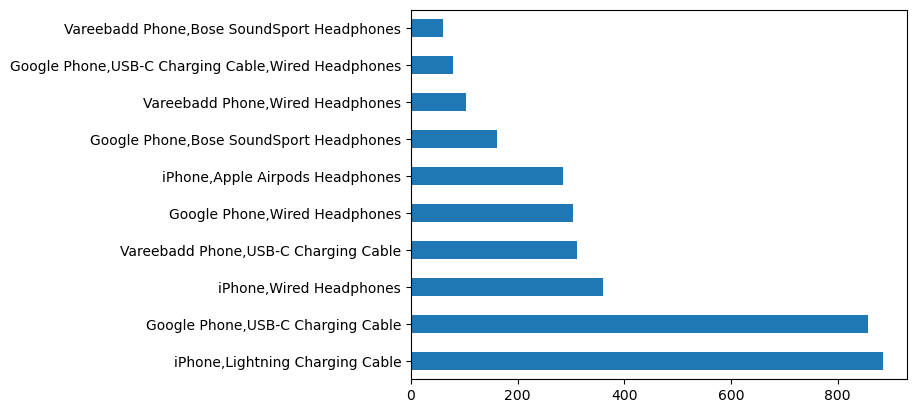

In [47]:
no_dup['Grouped Products'].value_counts()[0:10].plot.barh()
plt.ylabel('')